In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
% pylab inline

Populating the interactive namespace from numpy and matplotlib


* Download tables from HEASARC by using [browse_extract_wget.pl](https://heasarc.nasa.gov/FTP/heasarc/software/web_batch/browse_extract_wget.pl) version 2a

In [2]:
### Uncomment below for downloading: 
! wget -q -nc https://heasarc.nasa.gov/FTP/heasarc/software/web_batch/browse_extract_wget.pl \
    -O browse_extract_wget.pl

! perl ./browse_extract_wget.pl \
table=numaster \
position='0.,0.' \
radius=100000 \
coordinates=Galactic \
fields=All \
format=Text \
resultmax=100000 \
outfile=nustar-obs-raw.csv

In [4]:
# Final observation file size about 9 Mbytes (5k+ rows)
! wc nustar-obs-raw.csv

   5472  693604 8983975 nustar-obs-raw.csv


In [5]:
# It is written in txt format with '|' separator
! head -6 nustar-obs-raw.csv



Results from numaster
Coordinate system:galactic
|name                       |_l      |_b      |time               |obsid      |status   |exposure_a|observation_mode|obs_type|processing_date    |public_date|issue_flag|abstract                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [6]:
# converting to pandas dataset
data = pd.read_csv('nustar-obs-raw.csv', sep='|', header=0, skiprows=4)
data.head()

,Unnamed: 0,name,_l,_b,time,obsid,status,exposure_a,observation_mode,obs_type,...,prnb,roll_angle,slew_mode,software_version,solar_activity,spacecraft_mode,subject_category,title,_offset,Unnamed: 43
0,NaN,gcmagnetar,359.9796,-0.0415,2013-05-27T10:16:07,80002013010,archived,37319.0,SCIENCE,MAG,...,0,171.1724,EIGEN,Hea_30Jun2014_V6.16_nustardas_28May14_v1.4.1,null,INERTIAL,Proposed ToOs and Directors Discretionary Time...,Magnetars and Rotation-Powered Pulsars ...,2.7733,NaN
1,NaN,Gal_Cen_MOS003,0.0412,0.0232,2012-10-14T09:56:07,40010003001,archived,24200.0,SCIENCE,GPS,...,0,342.9842,EIGEN,Hea_30Jun2014_V6.16_nustardas_28May14_v1.4.1,null,INERTIAL,"Non-ToO Supernovae, Supernova Remnants, and Ga...",Galactic Plane Survey ...,2.8381,NaN
2,NaN,gcmagnetar,359.9801,-0.0436,2013-05-18T17:36:07,80002013008,archived,38832.0,SCIENCE,MAG,...,0,160.6695,EIGEN,Hea_30Jun2014_V6.16_nustardas_28May14_v1.4.1,null,INERTIAL,Proposed ToOs and Directors Discretionary Time...,Magnetars and Rotation-Powered Pulsars ...,2.8775,NaN
3,NaN,gcmagnetar,359.9825,-0.0470,2013-05-04T17:31:07,80002013004,archived,38526.0,SCIENCE,MAG,...,0,160.7201,EIGEN,Hea_30Jun2014_V6.16_nustardas_28May14_v1.4.1,null,INERTIAL,Proposed ToOs and Directors Discretionary Time...,Magnetars and Rotation-Powered Pulsars ...,3.0085,NaN
4,NaN,gcmagnetar,359.9803,-0.0475,2013-05-11T14:26:07,80002013006,archived,32616.0,SCIENCE,MAG,...,0,160.7343,EIGEN,Hea_30Jun2014_V6.16_nustardas_28May14_v1.4.1,null,INERTIAL,Proposed ToOs and Directors Discretionary Time...,Magnetars and Rotation-Powered Pulsars ...,3.0836,NaN


In [7]:
# Brief descrption of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5467 entries, 0 to 5466
Data columns (total 44 columns):
Unnamed: 0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          0 non-null float64
name                                                                  

In [8]:
# shorted column names for simplicity
r = []
for col in data.columns:
    r.append(col.replace(' ', ''))
data.columns = r

In [9]:
data.columns

Index(['Unnamed:0', 'name', '_l', '_b', 'time', 'obsid', 'status',
       'exposure_a', 'observation_mode', 'obs_type', 'processing_date',
       'public_date', 'issue_flag', 'abstract', 'bii', 'caldb_version',
       'category_code', 'comments', 'coordinated', 'copi_fname', 'copi_lname',
       'country', 'cycle', 'data_gap', 'end_time', 'exposure_b',
       'instrument_mode', 'lii', 'nupsdout', 'ontime_a', 'ontime_b',
       'pi_fname', 'pi_lname', 'priority', 'prnb', 'roll_angle', 'slew_mode',
       'software_version', 'solar_activity', 'spacecraft_mode',
       'subject_category', 'title', '_offset', 'Unnamed:43'],
      dtype='object')

In [10]:
# Note that are several proposal categories already included to HEASARC data
data['subject_category'].head(10)                                                             

0    Proposed ToOs and Directors Discretionary Time...
1    Non-ToO Supernovae, Supernova Remnants, and Ga...
2    Proposed ToOs and Directors Discretionary Time...
3    Proposed ToOs and Directors Discretionary Time...
4    Proposed ToOs and Directors Discretionary Time...
5    Non-Proposal ToOs                             ...
6    Galactic Compact Sources                      ...
7    Galactic Compact Sources                      ...
8    Galactic Compact Sources                      ...
9    Galactic Compact Sources                      ...
Name: subject_category, dtype: object

In [11]:
# First and last columns do not contain any relevant information and are removed:
data.drop([data.columns[0], data.columns[-1]], axis=1, inplace=True)
data.head()

,name,_l,_b,time,obsid,status,exposure_a,observation_mode,obs_type,processing_date,...,priority,prnb,roll_angle,slew_mode,software_version,solar_activity,spacecraft_mode,subject_category,title,_offset
0,gcmagnetar,359.9796,-0.0415,2013-05-27T10:16:07,80002013010,archived,37319.0,SCIENCE,MAG,2015-03-20T16:12:11,...,1,0,171.1724,EIGEN,Hea_30Jun2014_V6.16_nustardas_28May14_v1.4.1,null,INERTIAL,Proposed ToOs and Directors Discretionary Time...,Magnetars and Rotation-Powered Pulsars ...,2.7733
1,Gal_Cen_MOS003,0.0412,0.0232,2012-10-14T09:56:07,40010003001,archived,24200.0,SCIENCE,GPS,2015-03-17T19:38:20,...,1,0,342.9842,EIGEN,Hea_30Jun2014_V6.16_nustardas_28May14_v1.4.1,null,INERTIAL,"Non-ToO Supernovae, Supernova Remnants, and Ga...",Galactic Plane Survey ...,2.8381
2,gcmagnetar,359.9801,-0.0436,2013-05-18T17:36:07,80002013008,archived,38832.0,SCIENCE,MAG,2015-03-20T10:02:36,...,1,0,160.6695,EIGEN,Hea_30Jun2014_V6.16_nustardas_28May14_v1.4.1,null,INERTIAL,Proposed ToOs and Directors Discretionary Time...,Magnetars and Rotation-Powered Pulsars ...,2.8775
3,gcmagnetar,359.9825,-0.0470,2013-05-04T17:31:07,80002013004,archived,38526.0,SCIENCE,MAG,2015-03-20T02:56:11,...,1,0,160.7201,EIGEN,Hea_30Jun2014_V6.16_nustardas_28May14_v1.4.1,null,INERTIAL,Proposed ToOs and Directors Discretionary Time...,Magnetars and Rotation-Powered Pulsars ...,3.0085
4,gcmagnetar,359.9803,-0.0475,2013-05-11T14:26:07,80002013006,archived,32616.0,SCIENCE,MAG,2015-03-20T06:36:57,...,1,0,160.7343,EIGEN,Hea_30Jun2014_V6.16_nustardas_28May14_v1.4.1,null,INERTIAL,Proposed ToOs and Directors Discretionary Time...,Magnetars and Rotation-Powered Pulsars ...,3.0836


In [12]:
data['subject_category'] = data['subject_category'].apply(lambda x: str(x).rstrip())
categories = data['subject_category'].unique().tolist()
data['category_num'] = data['subject_category'].apply(lambda x: categories.index(x))
data['category_num'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
print(categories)

['Proposed ToOs and Directors Discretionary Time', 'Non-ToO Supernovae, Supernova Remnants, and Galactic diffuse', 'Non-Proposal ToOs', 'Galactic Compact Sources', 'Active galaxies and Quasars', 'Calibration Observations', 'Galaxy clusters and extragalactic diffuse objects', 'Solar System Objects', 'Non-Pointing data', 'Normal galaxies']


In [14]:
data['status'].unique()

array(['archived ', 'accepted ', 'processed', 'observed '], dtype=object)

In [15]:
data['issue_flag'].unique()

array(['         1', '         0', '      null'], dtype=object)

In [31]:
# Also, the data should be publicly available in HEASARC and have issue_flag = 0:
data = data[(data['status'] == 'archived ') & (data['issue_flag'].apply(lambda x: x[-1]) == '0')]

In [34]:
data.columns

Index(['name', '_l', '_b', 'time', 'obsid', 'status', 'exposure_a',
       'observation_mode', 'obs_type', 'processing_date', 'public_date',
       'issue_flag', 'abstract', 'bii', 'caldb_version', 'category_code',
       'comments', 'coordinated', 'copi_fname', 'copi_lname', 'country',
       'cycle', 'data_gap', 'end_time', 'exposure_b', 'instrument_mode', 'lii',
       'nupsdout', 'ontime_a', 'ontime_b', 'pi_fname', 'pi_lname', 'priority',
       'prnb', 'roll_angle', 'slew_mode', 'software_version', 'solar_activity',
       'spacecraft_mode', 'subject_category', 'title', '_offset',
       'category_num'],
      dtype='object')

In [35]:
for col in ['ontime_a', 'ontime_b', '_offset', 'category_num', '_l', '_b']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [36]:
data.describe()

,_l,_b,obsid,exposure_a,category_code,cycle,exposure_b,ontime_a,ontime_b,prnb,_offset,category_num
count,1744.000000,1744.000000,3.177000e+03,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3.177000e+03,1744.000000,3177.000000
mean,199.355221,10.087112,5.629825e+10,17119.084356,5.621970,0.824048,17097.685867,18636.673591,18640.162103,1.546577e+05,5174.939270,3.355052
std,102.543321,38.193001,2.066189e+10,29278.595400,2.057347,1.069771,29228.928145,31564.869481,31571.252323,1.599114e+06,2523.848134,1.630887
min,0.041200,-87.966900,1.501100e+07,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.838100,0.000000
25%,117.685050,-6.389825,4.003100e+10,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3762.731075,3.000000
50%,196.020150,2.835200,6.006108e+10,349.000000,6.000000,0.000000,348.000000,390.000000,390.000000,0.000000e+00,5331.445800,4.000000
75%,295.720100,41.976275,6.020200e+10,25297.000000,6.000000,1.000000,25271.000000,27482.000000,27497.000000,0.000000e+00,6898.984225,4.000000
max,359.987500,89.344300,9.040131e+10,427616.000000,9.000000,4.000000,426932.000000,457267.000000,457375.000000,1.870058e+07,10617.309100,9.000000


In [37]:
filtered_data = data[['obsid', 'ontime_a', 'ontime_b', '_offset', '_l', '_b', 'category_num']]
filtered_data = filtered_data.dropna(axis=0, how='any')
filtered_data.head()

,obsid,ontime_a,ontime_b,_offset,_l,_b,category_num
1,40010003001,26232.0,26246.0,2.8381,0.0412,0.0232,1
5,90101022001,509.0,509.0,3.2263,359.9680,-0.0432,2
6,30002002008,28408.0,28418.0,3.2592,359.9875,-0.0529,3
7,30002002012,14735.0,14742.0,3.2896,359.9724,-0.0474,3
8,30302006006,22179.0,22196.0,3.3325,359.9691,-0.0461,3


In [38]:
# group exposure by off-center angle _offset by making $10^\circ$ bins
dr = 10
filtered_data['raw_offset'] = filtered_data['_offset'].apply(lambda x: math.floor(x/(60.0*dr))*dr)
filtered_data.head()

binned_time = filtered_data.groupby('raw_offset').agg(sum)[['ontime_a', 'ontime_b']]

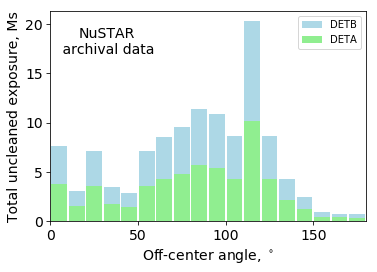

In [40]:
plt.xlim([0., 180.])
plt.bar(np.array(binned_time.index + 5), 
        1e-6*np.array(binned_time['ontime_a'] + binned_time['ontime_b']), 
        width=9.0, color='lightblue')
plt.bar(np.array(binned_time.index + 5), 
        1e-6*np.array(binned_time['ontime_a']), width=9.0, color='lightgreen')
plt.legend(['DETB', 'DETA'])
plt.xlabel('Off-center angle, ${}^\circ$', size=14)
plt.ylabel('Total uncleaned exposure, Ms', size=14)
plt.tick_params(axis ='both', which='major', length=4, labelsize =14, color='black')
plt.tick_params(axis ='both', which='minor', length=0)
plt.figtext(x=0.28, y=0.73, s='NuSTAR\n archival data', ha='center', size=14, color='black')
plt.subplots_adjust(left=0.15, right=0.88, top=0.88, bottom=0.15)

plt.savefig("nustar-uncleaned-exposure.pdf", format="pdf", transparent=True,rasterized=True,dpi=300, pad_inches=1)

Selecting only requested columns (pointing ID, exposures, coords, category -- cluster, galaxy etc)

In [41]:
filtered_data.head()

,obsid,ontime_a,ontime_b,_offset,_l,_b,category_num,raw_offset
1,40010003001,26232.0,26246.0,2.8381,0.0412,0.0232,1,0
5,90101022001,509.0,509.0,3.2263,359.9680,-0.0432,2,0
6,30002002008,28408.0,28418.0,3.2592,359.9875,-0.0529,3,0
7,30002002012,14735.0,14742.0,3.2896,359.9724,-0.0474,3,0
8,30302006006,22179.0,22196.0,3.3325,359.9691,-0.0461,3,0


In [42]:
filtered_data.groupby('category_num').agg(sum)[['ontime_a', 'ontime_b']]*1e-6

,ontime_a,ontime_b
category_num,,
0,4.245376,4.246119
1,6.985991,6.987357
2,4.473376,4.474637
3,10.555128,10.557283
4,28.266762,28.271416
5,0.691832,0.692064
6,1.410699,1.410989
9,2.579548,2.579930


In [44]:
filtered_data.to_csv('filtered_data_nustar.csv')
! wc filtered_data_nustar.csv

  1745   1745 111238 filtered_data_nustar.csv
